In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install wordcloud

In [3]:
from wordcloud import WordCloud

In [4]:
pd.set_option('display.max_rows',None)
np.set_printoptions(threshold=np.inf)

In [5]:
data = pd.read_excel('resturant.xlsx')

In [6]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775    080 42297555\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   
2          Yes         No  3.8/5    918                  +91 9663487993   
3           No         No  3.7/5     88                  +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [7]:
data.shape

(51717, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [9]:
data.drop(['url','address','phone','reviews_list','menu_item','listed_in(city)'],inplace=True,axis=1)

In [10]:
data.shape

(51717, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         43942 non-null  object 
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  float64
 10  listed_in(type)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


In [12]:
# pd.DataFrame(data['menu_item'].value_counts()) # different kinds of menu items

In [13]:
# checking for duplicated values
data.duplicated().sum()

16608

In [14]:
after_dropping_duplicates = data.drop_duplicates()

In [15]:
#after_dropping_duplicates[after_dropping_duplicates.name =='My Tea House'] #looking at one duplicate value

In [16]:
after_dropping_duplicates.shape

(35109, 11)

In [17]:
after_dropping_duplicates.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Dealing with Null values

In [18]:
str1 = after_dropping_duplicates['name'].iloc[10]

In [19]:
def clean_rest_name(name):
    if isinstance(name,str):
        if re.findall(r'[a-zA-Z0-9 ]',name):
                list_name = re.findall(r'[a-zA-Z0-9 ]',name) #list
        string_name = "".join(list_name)
        return string_name
    else:
        return name

In [20]:
def clean_rate(rates):
    if rates == "-" or rates == "NEW":
        return np.nan
    else:
        rates_converted = float(str(rates).split('/')[0])
        return rates_converted

In [21]:
after_dropping_duplicates['name'] = after_dropping_duplicates['name'].apply(clean_rest_name)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\2252155224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['name'] = after_dropping_duplicates['name'].apply(clean_rest_name)


In [22]:
after_dropping_duplicates['rate']=after_dropping_duplicates['rate'].apply(clean_rate)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\299326936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate']=after_dropping_duplicates['rate'].apply(clean_rate)


In [23]:
rate_listed_type = after_dropping_duplicates.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

In [24]:
rate_listed_type

listed_in(type)
Drinks & nightlife    4.072542
Pubs and bars         4.049132
Buffet                4.029394
Cafes                 3.909233
Desserts              3.789912
Dine-out              3.702836
Delivery              3.680076
Name: rate, dtype: float64

In [25]:
#sns.barplot(x=rate_listed_type.index, y =rate_listed_type)

In [26]:
# Group by listed type, fill missing values with rate as per group by
after_dropping_duplicates['rate'] = after_dropping_duplicates.groupby('listed_in(type)')['rate'].transform(lambda x:x.fillna(x.mean()))
after_dropping_duplicates['rate'] = round(after_dropping_duplicates['rate'],1)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\2389327590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate'] = after_dropping_duplicates.groupby('listed_in(type)')['rate'].transform(lambda x:x.fillna(x.mean()))
C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\2389327590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rate'] = round(after_dropping_duplicates['rate'],1)


In [27]:
# after_dropping_duplicates['rate'].fillna(after_dropping_duplicates['rate'].mean(),inplace=True) # fill na by mean of rate

In [28]:
after_dropping_duplicates['rate'].isnull().sum() # no nulls after filling with mean

0

In [29]:
after_dropping_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [30]:
after_dropping_duplicates['location']

0                         Banashankari
1                         Banashankari
2                         Banashankari
3                         Banashankari
4                         Basavanagudi
5                         Basavanagudi
6                          Mysore Road
7                         Banashankari
8                         Banashankari
9                         Banashankari
10                        Banashankari
11                        Banashankari
12                        Banashankari
13                        Banashankari
14                        Banashankari
15                        Banashankari
16                        Banashankari
17                        Banashankari
18                        Banashankari
19                        Banashankari
20                        Banashankari
21                        Banashankari
22                        Banashankari
23                        Banashankari
24                        Banashankari
25                       

In [31]:
after_dropping_duplicates['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [32]:
after_dropping_duplicates['location'].nunique()

93

In [33]:
# fill nulls with No Info
after_dropping_duplicates['location'].fillna("No Info",inplace=True)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\669435757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['location'].fillna("No Info",inplace=True)


In [34]:
# after_dropping_duplicates['location'].unique()

In [35]:
after_dropping_duplicates['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [36]:
after_dropping_duplicates['rest_type'].fillna("No Info",inplace=True)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\3689603234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['rest_type'].fillna("No Info",inplace=True)


In [37]:
np.nan in after_dropping_duplicates['rest_type'].unique() # no nulls

False

In [38]:
after_dropping_duplicates['dish_liked'].fillna("No Info",inplace=True)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\1795142276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['dish_liked'].fillna("No Info",inplace=True)


In [39]:
# top 10 dish liked
d_l = after_dropping_duplicates['dish_liked'].value_counts()[1:11]

In [40]:
#bar = sns.barplot(x=d_l.index, y =d_l)
#bar.set_xticklabels(labels=d_l.index)

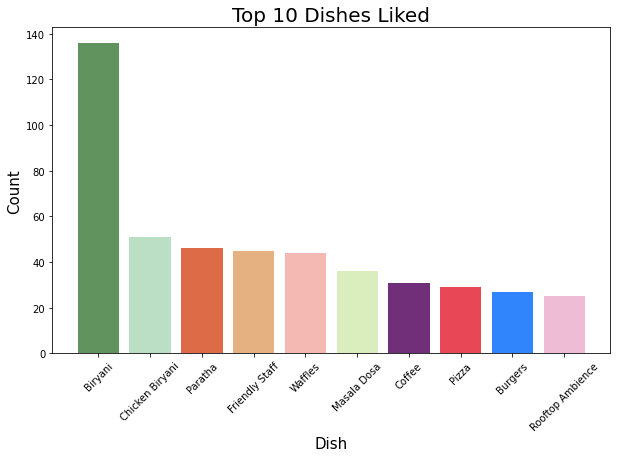

In [41]:
plt.figure(figsize=(10,6))
color_list = ['#60935d','#bbdfc5','#de6b48','#e5b181','#f4b9b2',
              '#daedbd','#712f79','#e84855','#3185fc','#efbcd5']
plt.bar(x=d_l.index, height =d_l.values,color=color_list)
plt.xticks(rotation=45)
plt.xlabel('Dish',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top 10 Dishes Liked',fontsize=20)
plt.show()

In [42]:
after_dropping_duplicates['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', 'South Indian, North Indian',
       'North Indian, Rajasthani', 'North Indian',
       'North Indian, South Indian, Andhra, Chinese',
       'Pizza, Cafe, Italian', 'Cafe, Italian, Continental',
       'Cafe, Mexican, Italian, Momos, Beverages', 'Cafe',
       'Cafe, Chinese, Continental, Italian', 'Cafe, Continental',
       'Cafe, Fast Food, Continental, Chinese, Momos',
       'Chinese, Cafe, Italian', 'Cafe, Italian, American',
       'Cafe, French, North Indian', 'Cafe, Pizza, Fast Food, Beverages',
       'Cafe, Fast Food', 'Italian, Fast Food, Cafe, European',
       'Cafe, Bakery', 'Cafe, South Indian', 'Cafe, Fast Food, Beverages',
       'North Indian, Cafe, Chinese, Fast Food', 'Cafe, Italian',
       'North Indian, Fast Food, Chinese, Burger', 'Bakery, Desserts',
       'Pizza', 'North Indian, Biryani, Fast Food', 'Biryani',
       'North Indian, Chinese, Fast Food', 'C

In [43]:
after_dropping_duplicates['cuisines'].fillna("No Info",inplace=True)

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\2944456753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['cuisines'].fillna("No Info",inplace=True)


In [44]:
after_dropping_duplicates['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [45]:
after_dropping_duplicates['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [46]:
#after_dropping_duplicates['approx_cost(for two people)'].fillna(0,inplace=True)

In [47]:
after_dropping_duplicates['approx_cost(for two people)'] = after_dropping_duplicates.groupby('listed_in(type)')['approx_cost(for two people)'].transform(lambda x:x.fillna(x.mean()))

C:\Users\Saurabh Mulgaonkar\AppData\Local\Temp\ipykernel_2992\1493509402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_dropping_duplicates['approx_cost(for two people)'] = after_dropping_duplicates.groupby('listed_in(type)')['approx_cost(for two people)'].transform(lambda x:x.fillna(x.mean()))


In [48]:
# after_dropping_duplicates['approx_cost(for two people)'].fillna(after_dropping_duplicates.groupby('rest_type')['approx_cost(for two people)'].transform('mean'),inplace =True)

In [49]:
after_dropping_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  35109 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.2+ MB


In [50]:
data2 = after_dropping_duplicates.copy()

# Analysis

In [51]:
#data2.head()

In [52]:
#data2[['name','location','votes']].sort_values(by='votes',ascending=False)[:10]

In [53]:
#after_dropping_duplicates.loc[[49170,50059,49627,4944,4801,3921]]

In [54]:
#after_dropping_duplicates[['name','location','rate']].sort_values(by='rate',ascending=False)[:10]

In [55]:
# Q1 Restaurant with the highest number of votes
highest_votes = data2.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False)[:10].reset_index()
highest_votes[:5]

name         votes
0  Byg Brewski Brewing Company  16588.500000
1                         Toit  14956.000000
2              The Black Pearl   9562.333333
3                  Big Pitcher   9164.500000
4        Arbor Brewing Company   8396.545455

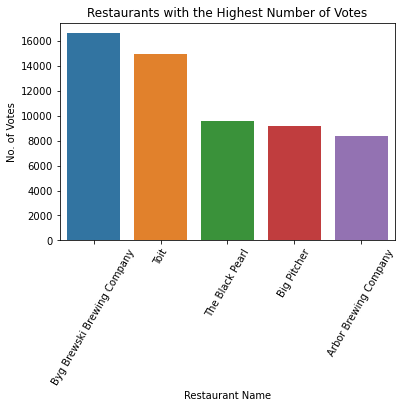

In [56]:
bplot = sns.barplot(data = highest_votes[:5], x='name',y='votes')
bplot.set_xticklabels(labels=highest_votes[:5]['name'],rotation=60)
bplot.set(xlabel='Restaurant Name',
         ylabel='No. of Votes',
         title='Restaurants with the Highest Number of Votes');

In [57]:
# Q2 Restaurant with the highest ratings
data2.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False)[:10].reset_index()

name      rate
0     Byg Brewski Brewing Company  4.900000
1                Sant Spa Cuisine  4.900000
2  Asia Kitchen By Mainland China  4.900000
3                    Punjab Grill  4.871429
4          Belgian Waffle Factory  4.852381
5                The Pizza Bakery  4.800000
6                 OG Variar  Sons  4.800000
7                        Flechazo  4.800000
8        Barbecue by Punjab Grill  4.750000
9                             CTR  4.750000

In [58]:
#Q3 Most expensive restaurant
data2[['name','approx_cost(for two people)']].groupby('name').mean().sort_values(by='approx_cost(for two people)',ascending=False)[:10].reset_index()

name  approx_cost(for two people)
0  Le Cirque Signature  The Leela Palace                       6000.0
1              Royal Afghan  ITC Windsor                       5000.0
2                  Malties  Radisson Blu                       4500.0
3              La Brasserie  Le Meridien                       4100.0
4      Edo Restaurant  Bar  ITC Gardenia                       4000.0
5              Jamavar  The Leela Palace                       4000.0
6          Masala Klub  The Taj West End                       4000.0
7              Grill 99  The RitzCarlton                       4000.0
8    Dum Pukht Jolly Nabobs  ITC Windsor                       4000.0
9                   Dakshin  ITC Windsor                       4000.0

In [59]:
#Q4 Most cheap rest
data2[['name','approx_cost(for two people)']].groupby('name').mean().sort_values(by='approx_cost(for two people)',ascending=True)[:10].reset_index()

name  approx_cost(for two people)
0            Srinidhi Sagar Deluxe                         40.0
1                    Bread  Better                         50.0
2                       Funky Food                         60.0
3                Nellore Dosa Camp                         70.0
4                          Namaste                         70.0
5                        Dtink Lab                         80.0
6                        Dosa Cafe                         80.0
7  Shree Ganesh Fruit Juice Centre                         90.0
8             Durga Bikaner Sweets                        100.0
9                      Luna Sweets                        100.0

In [60]:
#Q5 Highest types of restautants
htr = data2.groupby('listed_in(type)')['name'].count().sort_values(ascending=False)
htr

listed_in(type)
Delivery              16220
Dine-out              12965
Desserts               2478
Cafes                  1252
Drinks & nightlife      913
Buffet                  676
Pubs and bars           605
Name: name, dtype: int64

In [61]:
#Q6 cafe with highest rating
data2[after_dropping_duplicates['listed_in(type)']=='Cafes'].groupby('name')[['name','rate']].agg({'rate':'mean'}).sort_values(by='rate',ascending=False).reset_index()

name      rate
0                                             Hammered  4.657143
1                                      Lot Like Crepes  4.633333
2                                             Truffles  4.600000
3                              The Blue Wagon  Kitchen  4.600000
4                            The Hole in the Wall Cafe  4.600000
5                                            Here  Now  4.600000
6                                         Market Table  4.500000
7                                        Monets Bistro  4.500000
8                Bloomsburys Global Kitchen  Bakehouse  4.500000
9                                 Avista Cafe Pizzeria  4.500000
10                                         99 Pancakes  4.500000
11                                        Dyu Art Cafe  4.500000
12                                           Brik Oven  4.483333
13                                           Chai Days  4.450000
14                                              Stoner  4.433333
15                               Nuts Over Salads Cafe  4.420000
16                                              Onesta  4.415789
17                                           Caf Felix  4.400000
18                                          TRIGEREATO  4.400000
19                    Sixth Avenue Cafe And Patisserie  4.400000
20                                           Zee5 Loft  4.400000
21                                             YORK St  4.400000
22                                             Lavonne  4.400000
23                                    Mimansa  Foxtrot  4.400000
24                              A Hole Lotta Love Cafe  4.375000
25                                       Matteo Coffea  4.350000
26                                     Glens Bakehouse  4.342857
27                             Enerjuvate Studio  Cafe  4.333333
28                             Japan Travel Cafe Azuki  4.300000
29                                         Dice N Dine  4.300000
30                                        The Roastery  4.300000
31                                        Blk Plus Wht  4.300000
32                                      Dolci Desserts  4.300000
33                                             Cafesta  4.300000
34                                             Dhyaana  4.300000
35                                        Sector 7 Caf  4.300000
36                                           Skoolroom  4.300000
37                                   Little Green Cafe  4.300000
38                                              Stoked  4.300000
39                        Based On A True Story Bistro  4.300000
40                                    Coffee Mechanics  4.300000
41                                           Lazy Suzy  4.300000
42                                       Hungry Hippie  4.300000
43                                         Eating Love  4.300000
44                                          Ciclo Cafe  4.300000
45                                            Cafe Max  4.300000
46                                         JustBe Cafe  4.300000
47                                       Bean Flickers  4.300000
48                                               Zoeys  4.300000
49                                    Enchanted Garden  4.300000
50     Bengaluru Baking Company  JW Marriott Bengaluru  4.300000
51                                         Peppa Zzing  4.300000
52                       Infinitea Tea Room  Tea Store  4.285714
53                                          Chai Galli  4.283333
54                                                BLOW  4.280000
55                                          Cafe Kaara  4.260000
56                                        Mudpipe Cafe  4.260000
57                                        Krazzy Folds  4.250000
58                                   Breads and Banter  4.250000
59                                         Cafe Azzure  4.242857
60                                      Tea Villa Cafe  4.233333
61                  

In [62]:
#Q7 cafe with highest voting
data2[after_dropping_duplicates['listed_in(type)']=='Cafes'].groupby('name')[['name','votes']].agg({'votes':'mean'}).sort_values(by='votes',ascending=False).reset_index()

name        votes
0                                             Truffles  7524.615385
1                            The Hole in the Wall Cafe  7122.750000
2                                             Hammered  4488.142857
3                                               Onesta  4059.421053
4                                         Dyu Art Cafe  3841.000000
5                               A Hole Lotta Love Cafe  2868.000000
6                                         Green Theory  2847.750000
7                                         Om Made Cafe  2732.600000
8                                  Mr Beans  Home Cafe  2712.333333
9                                               Bundar  2449.000000
10                                         Cafe Azzure  2393.571429
11                                       Matteo Coffea  2346.333333
12                                  Smallys Resto Cafe  2000.750000
13                                              Stoner  1939.555556
14                                        Krazzy Folds  1904.000000
15                                           Brik Oven  1899.500000
16                                  The Teal Door Cafe  1852.000000
17                                    Bistro Claytopia  1850.666667
18                                         Dice N Dine  1805.800000
19                                           Loveshack  1764.000000
20                     The White Room  Coffee  Kitchen  1724.800000
21                                     Glens Bakehouse  1659.571429
22                                            Cafe Max  1651.000000
23                                     Boondock Bistro  1649.000000
24                                           Here  Now  1583.500000
25                                  154 Breakfast Club  1514.000000
26                                       Hungry Hippie  1469.400000
27                                          Dr Sheesha  1445.000000
28                                The Ants Cafe  Store  1383.500000
29                                          Ciclo Cafe  1300.000000
30                                           Chaipatty  1270.500000
31                                           Lazy Suzy  1246.500000
32                                        Attic Lounge  1238.500000
33                                               Smise  1208.500000
34                                        Mudpipe Cafe  1193.600000
35                                            Tea Brew  1149.000000
36                                         Peppa Zzing  1134.000000
37                                             Lavonne  1112.500000
38                                        Sector 7 Caf  1101.000000
39                                          Cafe Thulp  1076.428571
40                                         Cafe Medley  1063.400000
41                                     Lot Like Crepes  1024.666667
42                                 TherPUP  a Dog Cafe  1012.000000
43                                                BLOW   957.800000
44                                             YORK St   946.000000
45                                     San Churro Cafe   918.000000
46                                               Zoeys   897.500000
47                                        Mustard Cafe   892.666667
48                                          Cafe Dhide   873.200000
49                                   Peppermill Bistro   868.000000
50                                     Beyond Elements   868.000000
51                                   Spoonful Of Sugar   861.000000
52                                 Barley  Grapes Cafe   842.000000
53                                  Giselle Resto Cafe   840.000000
54                                    Lakeview Milkbar   839.363636
55                                           Go Native   839.000000
56                                               Orzuv   837.000000
57                       Infinitea Tea Room  Tea Store   835.428571
58                                    

In [63]:
#Q8 deserts with highest rating
data2[after_dropping_duplicates['listed_in(type)']=='Desserts'].groupby('name')[['name','rate']].agg({'rate':'mean'}).sort_values(by='rate',ascending=False).reset_index()

name      rate
0                               Belgian Waffle Factory  4.850000
1                                     The Pizza Bakery  4.800000
2                                      OG Variar  Sons  4.800000
3                                             Flechazo  4.700000
4                                             Truffles  4.700000
5                                             Hammered  4.683333
6                                     Milano Ice Cream  4.633333
7                                         Kurtoskalacs  4.620000
8                                      Lot Like Crepes  4.600000
9                                    Mugful Of Stories  4.600000
10               Bloomsburys Global Kitchen  Bakehouse  4.500000
11            Fabelle Chocolate Boutique  ITC Gardenia  4.500000
12                                Avista Cafe Pizzeria  4.500000
13                              Corner House Ice Cream  4.465217
14                                              Stoner  4.433333
15                    Sixth Avenue Cafe And Patisserie  4.425000
16                                       Poonam Sweets  4.400000
17                            Le Gateau  The Cake Shop  4.400000
18                                        Waffle Walle  4.400000
19                                             Lavonne  4.400000
20                                          Black Deer  4.400000
21                                           Zee5 Loft  4.400000
22                                Bubblewrap Waffle Co  4.400000
23                    GMT  Gelateria Montecatini Terme  4.400000
24                                              Onesta  4.377778
25                                              eatfit  4.376923
26                                          TRIGEREATO  4.366667
27                                      Art of Delight  4.362500
28                                     Glens Bakehouse  4.342857
29                                   Natural Ice Cream  4.342105
30                                         99 Pancakes  4.322222
31                                          The Marash  4.300000
32                                       Dream a Dozen  4.300000
33                                      Dolci Desserts  4.300000
34                                          Soul Treat  4.300000
35                                           Occasions  4.300000
36                                         Zero Kelvin  4.300000
37                                        Berryd Alive  4.300000
38                                             Cafesta  4.300000
39                                           Lazy Suzy  4.300000
40                                           Skoolroom  4.300000
41               Cinnamon  Renaissance Hotel Bengaluru  4.300000
42                                     The Sugar Fairy  4.300000
43     Bengaluru Baking Company  JW Marriott Bengaluru  4.300000
44                        Based On A True Story Bistro  4.300000
45                              Gobble Up Churros Cafe  4.300000
46                                         Mane Holige  4.300000
47                                       Albert Bakery  4.300000
48                                    The Bier Library  4.300000
49                      Alchemy  The Chancery Pavilion  4.300000
50                                         IceBreakers  4.260000
51                                   Breads and Banter  4.250000
52                                    The Waffle Press  4.250000
53                                            Cakewala  4.240000
54                                   XO Belgian Waffle  4.235294
55                                      Tea Villa Cafe  4.233333
56                                        Waffle Magic  4.200000
57                                   Patisserie Nitash  4.200000
58                                          Eat Street  4.200000
59                                       Crafted Plate  4.200000
60                                            Pancuzzi  4.200000
61                  

In [64]:
#Q9 deserts with highest voting
data2[after_dropping_duplicates['listed_in(type)']=='Desserts'].groupby('name')[['name','votes']].agg({'votes':'mean'}).sort_values(by='votes',ascending=False).reset_index()

name        votes
0                                             Flechazo  7154.000000
1                                             Hammered  4750.666667
2                                             Truffles  3912.000000
3                                               Onesta  3826.777778
4                                         Green Theory  2852.000000
5                                             Bonsouth  2621.250000
6                                               Stoner  1948.111111
7                                         Berryd Alive  1902.333333
8                                   The Teal Door Cafe  1855.000000
9                                     Bistro Claytopia  1850.666667
10                                              Maiyas  1780.000000
11                                    The Pizza Bakery  1754.500000
12                     The White Room  Coffee  Kitchen  1733.400000
13                                  Smallys Resto Cafe  1707.800000
14                                     Glens Bakehouse  1660.714286
15                                          Eat Street  1532.500000
16                                      Art of Delight  1362.750000
17                                           Chaipatty  1272.000000
18                                           Lazy Suzy  1247.000000
19                                               Murli  1239.500000
20                                     OG Variar  Sons  1158.500000
21                                             Lavonne  1115.500000
22                                     Lot Like Crepes  1026.666667
23                                     San Churro Cafe   918.000000
24                                   Spoonful Of Sugar   863.000000
25                              Belgian Waffle Factory   841.600000
26                                    Lakeview Milkbar   839.636364
27                                    Milano Ice Cream   831.666667
28                      Kesar Sweet Shop and Fast Food   826.333333
29                                          Cool Joint   821.000000
30               Bloomsburys Global Kitchen  Bakehouse   744.500000
31                                      Caffe Pascucci   720.000000
32                                      Tea Villa Cafe   716.666667
33                              Corner House Ice Cream   714.173913
34                                        Waffle Walle   677.000000
35                          Anand Sweets And Savouries   675.500000
36                                      Dolci Desserts   655.200000
37                                            Grubbery   638.000000
38                                         Richie Rich   629.000000
39                                             Carrots   601.750000
40                                             Cafesta   590.000000
41                                        Waffle Magic   587.500000
42                                           Skoolroom   573.000000
43                                              eatfit   570.461538
44                                    The Bier Library   566.000000
45                                  Olivers Pub  Diner   548.000000
46                            Le Gateau  The Cake Shop   542.000000
47     Bengaluru Baking Company  JW Marriott Bengaluru   523.333333
48                                   TAB  Take A Break   522.000000
49                                        Roundup Cafe   520.200000
50                                       Dunkin Donuts   516.142857
51                                 Cafe At The Atelier   510.000000
52                                             BelgYum   507.750000
53                                Avista Cafe Pizzeria   506.000000
54                                          V B Bakery   502.000000
55                                  The Bangalore Cafe   499.800000
56                        Based On A True Story Bistro   496.000000
57                      Alchemy  The Chancery Pavilion   470.200000
58                                Two 

In [65]:
#Q10 Give me the list of all restaurants with the letters 'tea' in it
def tea(name):
    if 'tea' in str(name).lower():
        return True
    else:
        return False

In [66]:
data2[data2['name'].apply(tea)]['name'].unique()

array(['My Tea House', 'Steaming Mugs', 'Graffitea', '9 Tea',
       'Tea Villa Cafe', '4th Tea Block', 'Tea Bar', 'Tea Totallers',
       'Le Gateau  The Cake Shop', 'Coffee Tea  More',
       'The Coffee Bean  Tea Leaf', 'Infinitea Tea Room  Tea Store',
       'Tea and Wine Lounge', 'Portland Steakhouse  Cafe',
       'Tea Break Lounge', 'Tea Journey', 'Arabian Tea',
       'Lazio Steaks  More', 'Best Tea Cafe', 'Somilan Steak House',
       'Royal Tea House', 'Teashot', 'Wok Steam  Grills',
       'Mangalas Tea Time Cafe', 'Tea Trails',
       'Begin with usTea Time Cafe', 'TeaChaTe Express',
       'Chowk Tea Stall', 'Connies Restaurant  SteakHouse', 'TeamDelish',
       'Connies Restaurant  Steakhouse', 'The Teal Door Cafe',
       'Tea Addict', 'Tea Brew', 'The Mad Teapot', 'Steaks and Shakes',
       'Tea Garden', 'Serenitea4u', 'Teapoy Mutiny',
       'Hyderbadi Irani Tea', 'Tea Samskruthi', 'HighTeaParty Cafe',
       'Tease Whitefield'], dtype=object)

The above restaurants contain the word tea. Some words such as Steakhouse also have the letters tea in them so they also show up in the results

In [67]:
#Q11 Percentage of restaurants having online order option
online_order = data2.online_order.value_counts()
online_order

Yes    20886
No     14223
Name: online_order, dtype: int64

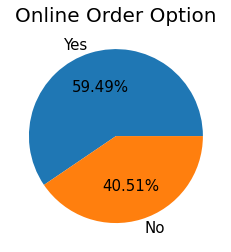

In [68]:
plt.figure()
plt.pie(online_order,labels=online_order.index,autopct="%1.2f%%",textprops={'fontsize': 15})
plt.title('Online Order Option', fontsize = 20)
plt.show()

**59.48% of restaurants have online order option available.**

Today a large number of orders are happening online due to the rise of food delivery apps. So it is surprising to see that only 59.48% have the online order option availalble.

In [69]:
#Q12 Percentage of restaurants having reservation option
pct_res = data2.book_table.value_counts()
pct_res

No     29675
Yes     5434
Name: book_table, dtype: int64

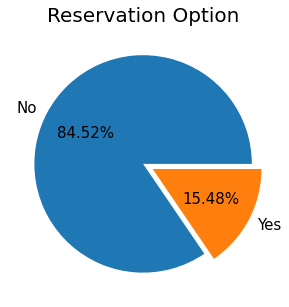

In [70]:
plt.figure(figsize=(5,5))
plt.pie(pct_res,labels=pct_res.index, autopct="%1.2f%%",textprops={'fontsize': 15}, explode=[0,0.1])
plt.title('Reservation Option', fontsize = 20, loc='center')
plt.show()

**84.5% of restaurants do not have a table reservation option.**

This shows that the restaurants believe that the table reservation option can impact business negatively, hence they have chosen to not have that option.

In [71]:
#Q13 Higest Rated by listed_in(type)
data2.groupby('listed_in(type)')['rate'].mean().sort_values(ascending=False)

listed_in(type)
Drinks & nightlife    4.073384
Pubs and bars         4.046777
Buffet                4.028698
Cafes                 3.908466
Desserts              3.791646
Dine-out              3.702406
Delivery              3.683218
Name: rate, dtype: float64

**Drinks & nightlife type is rated the highest, followed by Pubs and bars and then Buffet**

Which means that the best experiences in Bangalore can be found in the order as shown above.

In [72]:
#Q14 Higest Rated by location. Top 5
data2.groupby('location')['rate'].mean().sort_values(ascending=False)[:5]

location
Lavelle Road             4.166500
St. Marks Road           4.091429
Koramangala 5th Block    4.081885
Church Street            4.058166
Koramangala 3rd Block    4.038760
Name: rate, dtype: float64

**Top 5 rated locations are shown above**

For the best experience it would be wise to visit the restaurants in these locations

In [73]:
#Q15 What are all the different cuisines
cuisines = ",".join(data2['cuisines']) # convert series to string
all_cuisines = cuisines.split(',') # create a list of all cuisines
ls_cuisines = pd.Series(all_cuisines).apply(lambda x:x.strip()) # remove unnecessary spaces
ls_cuisines.unique() # show all unique cuisines

array(['North Indian', 'Mughlai', 'Chinese', 'Thai', 'Cafe', 'Mexican',
       'Italian', 'South Indian', 'Rajasthani', 'Andhra', 'Pizza',
       'Continental', 'Momos', 'Beverages', 'Fast Food', 'American',
       'French', 'European', 'Bakery', 'Burger', 'Desserts', 'Biryani',
       'Street Food', 'Rolls', 'Ice Cream', 'Healthy Food', 'Salad',
       'Asian', 'Korean', 'Indonesian', 'Japanese', 'Goan', 'Seafood',
       'Kebab', 'Steak', 'Mithai', 'Iranian', 'Sandwich', 'Juices',
       'Mangalorean', 'Vietnamese', 'Hyderabadi', 'Bengali', 'Arabian',
       'BBQ', 'Tea', 'Afghani', 'Lebanese', 'Finger Food', 'Tibetan',
       'No Info', 'Charcoal Chicken', 'Middle Eastern', 'Mediterranean',
       'Wraps', 'Kerala', 'Oriya', 'Bihari', 'Roast Chicken',
       'Maharashtrian', 'Bohri', 'African', 'Nepalese', 'Turkish',
       'Tamil', 'Tex-Mex', 'Belgian', 'Gujarati', 'South American',
       'Konkan', 'Drinks Only', 'Awadhi', 'Chettinad', 'Coffee', 'Indian',
       'Afghan', 'Modern 

In [74]:
text = ",".join(ls_cuisines.unique() )
text

'North Indian,Mughlai,Chinese,Thai,Cafe,Mexican,Italian,South Indian,Rajasthani,Andhra,Pizza,Continental,Momos,Beverages,Fast Food,American,French,European,Bakery,Burger,Desserts,Biryani,Street Food,Rolls,Ice Cream,Healthy Food,Salad,Asian,Korean,Indonesian,Japanese,Goan,Seafood,Kebab,Steak,Mithai,Iranian,Sandwich,Juices,Mangalorean,Vietnamese,Hyderabadi,Bengali,Arabian,BBQ,Tea,Afghani,Lebanese,Finger Food,Tibetan,No Info,Charcoal Chicken,Middle Eastern,Mediterranean,Wraps,Kerala,Oriya,Bihari,Roast Chicken,Maharashtrian,Bohri,African,Nepalese,Turkish,Tamil,Tex-Mex,Belgian,Gujarati,South American,Konkan,Drinks Only,Awadhi,Chettinad,Coffee,Indian,Afghan,Modern Indian,Lucknowi,Australian,Kashmiri,Spanish,Malaysian,Burmese,Sushi,Portuguese,Parsi,Greek,North Eastern,Bar Food,Singaporean,Naga,Cantonese,Grill,Bubble Tea,Hot dogs,Assamese,Sri Lankan,Mongolian,Paan,British,Pan Asian,German,Russian,Jewish,Vegan,Raw Meats,Malwani,Sindhi'

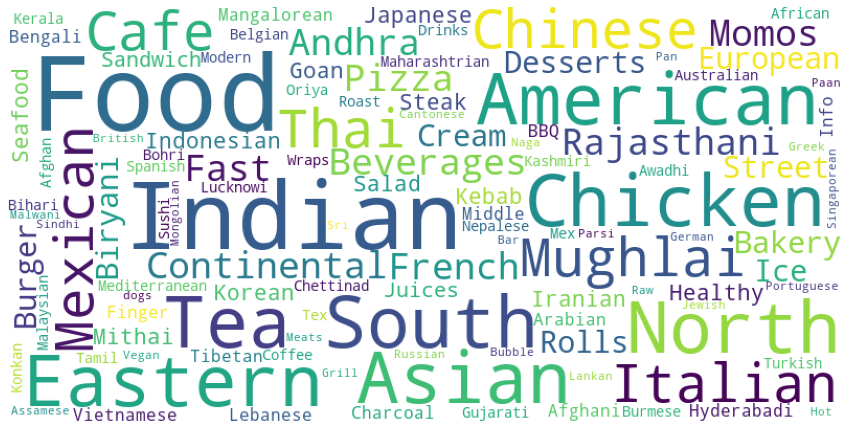

In [75]:
wordcloud = WordCloud(width=800, height=400,max_font_size=100,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
# Q16 Top 10 Cuisine type by count served by restaurants
ls_cuisines.value_counts()[:10]

North Indian    14653
Chinese         10623
South Indian     5663
Fast Food        5263
Biryani          4518
Continental      4416
Desserts         3834
Cafe             3827
Beverages        3190
Italian          2552
dtype: int64

In [77]:
# Q17 No of Unique Dishes as per the data
dishes = ",".join(data2['dish_liked']) # convert series to string
all_dishes = dishes.split(',') # create a list of all cuisines
ls_dishes = pd.Series(all_dishes).apply(lambda x:x.strip()) # remove unnecessary spaces
ls_dishes.nunique() # show all unique cuisines

2793

In [78]:
# Q18 Top 10 dishes liked (count) served by restaurants
ls_dishes.value_counts()[1:11]# first one is No Info

Pasta         2714
Cocktails     2552
Burgers       2318
Pizza         2283
Mocktails     1668
Biryani       1615
Coffee        1516
Sandwiches    1239
Paratha       1175
Nachos        1114
dtype: int64

In [79]:
text2 = ",".join(list(ls_dishes.value_counts()[1:101].index))
text2

'Pasta,Cocktails,Burgers,Pizza,Mocktails,Biryani,Coffee,Sandwiches,Paratha,Nachos,Salads,Beer,Noodles,Fish,Chicken Biryani,Mutton Biryani,Tea,Butter Chicken,Sea Food,Rolls,Fries,Momos,Waffles,Chaat,Thali,Sandwich,Tandoori Chicken,Lassi,Brownie,Roti,Salad,Hot Chocolate,Dal Makhani,Chicken Curry,Vegetable Biryani,Tiramisu,Masala Dosa,Gulab Jamun,Chicken Grill,Paneer Tikka,Raita,Pancakes,Cheesecake,Chilli Chicken,Appam,Hyderabadi Biryani,French Fries,Filter Coffee,Shawarma,Pav Bhaji,Vada,Panneer Butter Masala,Chicken Wings,Buttermilk,Garlic Bread,Lunch Buffet,Butter Naan,Panipuri,Peri Peri Chicken,Chicken Tikka,Naan,Neer Dosa,Sangria,Cappuccino,Mojito,Chicken Kebab,Murgh Ghee Roast,Ghee Rice,Samosa,Idli,Craft Beer,Wine,Long Island Iced Tea,Potato Wedges,Steak,Jalebi,Manchow Soup,Thick Shakes,Spring Roll,Chocolate Cake,Ginger Tea,Veg Thali,Rasmalai,Chai,Cup Cake,Chole,Poha,Kheer,Chole Bhature,Sushi,Breakfast Buffet,Chicken Burger,Draught Beer,Chicken Lollipop,Prawn,Pepper Chicken,Sweet Las

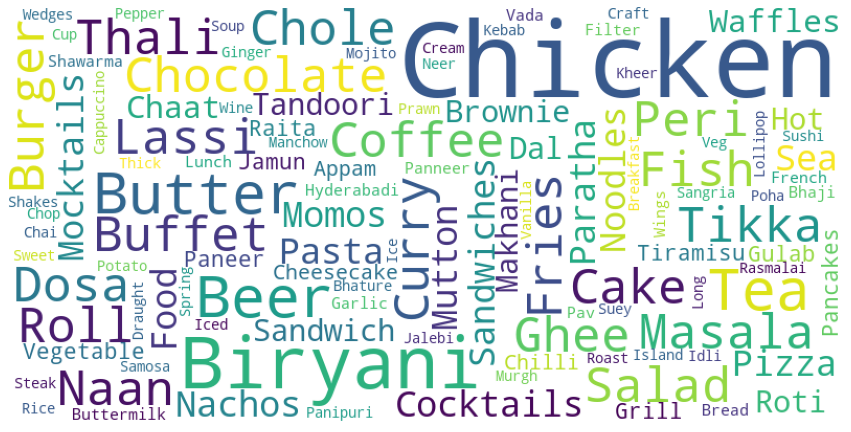

In [80]:
#Create a wordcloud for top 100 dishes liked
wordcloud2 = WordCloud(width=800, height=400,max_font_size=100,background_color="white").generate(text2)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

**A Large variety of food available in Bangalore**

In [81]:
#Q19 No of restaurants per location. Top 10

In [82]:
# the data seems incorrect. 
# For eg: At Cunningham Road there is only one Hammerred restaurant but the data shows 4 outlets.
# I have checked on google maps and I find only 2 Hammered restaurants in Bangalore.
# The data is duplicated due to difference in no of votes for each row.

In [83]:
#data3 = data2.drop(['listed_in(type)','votes'],axis=1) # these column cause a lot of duplicates to remain
data3 = data2[['name','location']]

In [84]:
data3 = data3.drop_duplicates()
data3.shape

(12114, 2)

In [85]:
#eg after removing duplicates
#data3[data3['name']=='Hammered'] 
#data3[data3['name']=='Cafe Coffee Day']

In [86]:
data3.groupby(['location'])['name'].count().sort_values(ascending=False)[:10]

location
Whitefield           822
BTM                  698
Electronic City      695
HSR                  683
Marathahalli         656
Indiranagar          524
JP Nagar             502
Bannerghatta Road    448
Jayanagar            352
Bellandur            348
Name: name, dtype: int64

In [87]:
#Q20 No of restaurants per location. Least 10
data3.groupby(['location'])['name'].count().sort_values(ascending=False).tail(10)

location
North Bangalore         7
Nagarbhavi              4
West Bangalore          4
Yelahanka               4
Rajarajeshwari Nagar    2
Central Bangalore       2
Langford Town           2
Kengeri                 1
Jakkur                  1
Peenya                  1
Name: name, dtype: int64

In [88]:
#data3[data3['location']=='North Bangalore'] #for example

In [89]:
#data2[data2['name'] == '38 Sugar Lane'] # 0 no of votes, ratio comes to inf
#data2[data2['name'] == '1441 Pizzeria']

In [90]:
#Q Highest rate per vote for restaurants
#data4 = data2[data2['votes']!=0]
#rpv = (data4.groupby('name')['votes'].mean()/data4.groupby('rate')['votes'].mean())
#rpv.sort_values(ascending=False)

In [91]:
#Q21 Unique rest_type
rest_types = ",".join(data2['rest_type']) # convert series to string
all_rest_types = rest_types.split(',') # create a list of all cuisines
ls_rt = pd.Series(all_rest_types).apply(lambda x:x.strip()) # remove unnecessary spaces
ls_rt.unique() # show all unique cuisines

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', 'No Info',
       'Dhaba', 'Club', 'Irani Cafee', 'Bhojanalya', 'Pop Up',
       'Meat Shop'], dtype=object)

In [92]:
# Q22 Top 10 rest_type by count
ls_rt.value_counts()[:10]

Quick Bites       13202
Casual Dining      9920
Cafe               3682
Delivery           2751
Dessert Parlor     2210
Bar                1942
Bakery             1295
Takeaway           1293
Beverage Shop       892
Pub                 847
dtype: int64

In [93]:
#Q23 Avg rating of restaurants as per online order availability
data2.groupby('online_order')['rate'].mean().sort_values(ascending=False)

online_order
Yes    3.747817
No     3.701498
Name: rate, dtype: float64

Minor difference in rating, which means that quality of service probably matters over whether online order option is available or not.

In [94]:
#Q24 Avg rating of restaurants as per table booking availability
data2.groupby('book_table')['rate'].mean().sort_values(ascending=False)

book_table
Yes    4.157195
No     3.650652
Name: rate, dtype: float64

There is a good amount of difference in the rating. Restaurants with table booking facility are rated higher.

In [95]:
#Q25 Avg cost per listed type
data2.groupby('listed_in(type)')['approx_cost(for two people)'].mean().sort_values(ascending=False)

listed_in(type)
Drinks & nightlife    1456.401766
Pubs and bars         1328.810720
Buffet                1322.652757
Cafes                  643.875907
Dine-out               623.740588
Delivery               489.753674
Desserts               403.108492
Name: approx_cost(for two people), dtype: float64

In [96]:
#Q26 Top 10 expensive locations
data2.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False)[:10]

location
Sankey Road         2426.190476
Lavelle Road        1395.121767
Race Course Road    1370.212766
Infantry Road       1255.952381
MG Road             1251.171461
Residency Road      1039.985341
St. Marks Road       998.571429
Richmond Road        893.871150
Cunningham Road      883.623693
Church Street        881.431767
Name: approx_cost(for two people), dtype: float64

In [97]:
# map vizual if possible

In [98]:
#Q27 Avg cost per order type
data2.groupby('online_order')['approx_cost(for two people)'].mean()

online_order
No     652.141416
Yes    554.819879
Name: approx_cost(for two people), dtype: float64

**Online order seems to be cheaper on average compared to Offline order. This could be possibly due to discount coupons available on Zomato**

In [99]:
#Q28 Avg cost per reservation
data2.groupby('book_table')['approx_cost(for two people)'].mean()

book_table
No      469.311722
Yes    1276.509017
Name: approx_cost(for two people), dtype: float64

**Avg Cost for table reservation is much higher than cost for no reservation.**

In [100]:
#Q29 Avg cost by rate
bins = [1,2,3,4,5]
data2.groupby(pd.cut(data2['rate'],bins))['approx_cost(for two people)'].mean().sort_values(ascending=False)

rate
(1, 2]    1333.333333
(4, 5]     995.953112
(2, 3]     508.181216
(3, 4]     479.246744
Name: approx_cost(for two people), dtype: float64

The rates are first grouped into bins and then the average of approx cost for each bin is calculated.
There does not seem to be any pattern related to the answer above.

It could be that except for a few outliers, the rating and cost are related somewhat.

In [101]:
np.corrcoef([1.5,2.5,3.5,4.5], data2.groupby(pd.cut(data2['rate'],bins))['approx_cost(for two people)'].mean())

array([[ 1.        , -0.32678246],
       [-0.32678246,  1.        ]])

The correlation coefficient is slighly negative, which means that while the ratings and the approx cost have a negative relationship, there is not much strength to that relationship.

In [102]:
data2.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

# Visualizations

In [109]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  35109 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


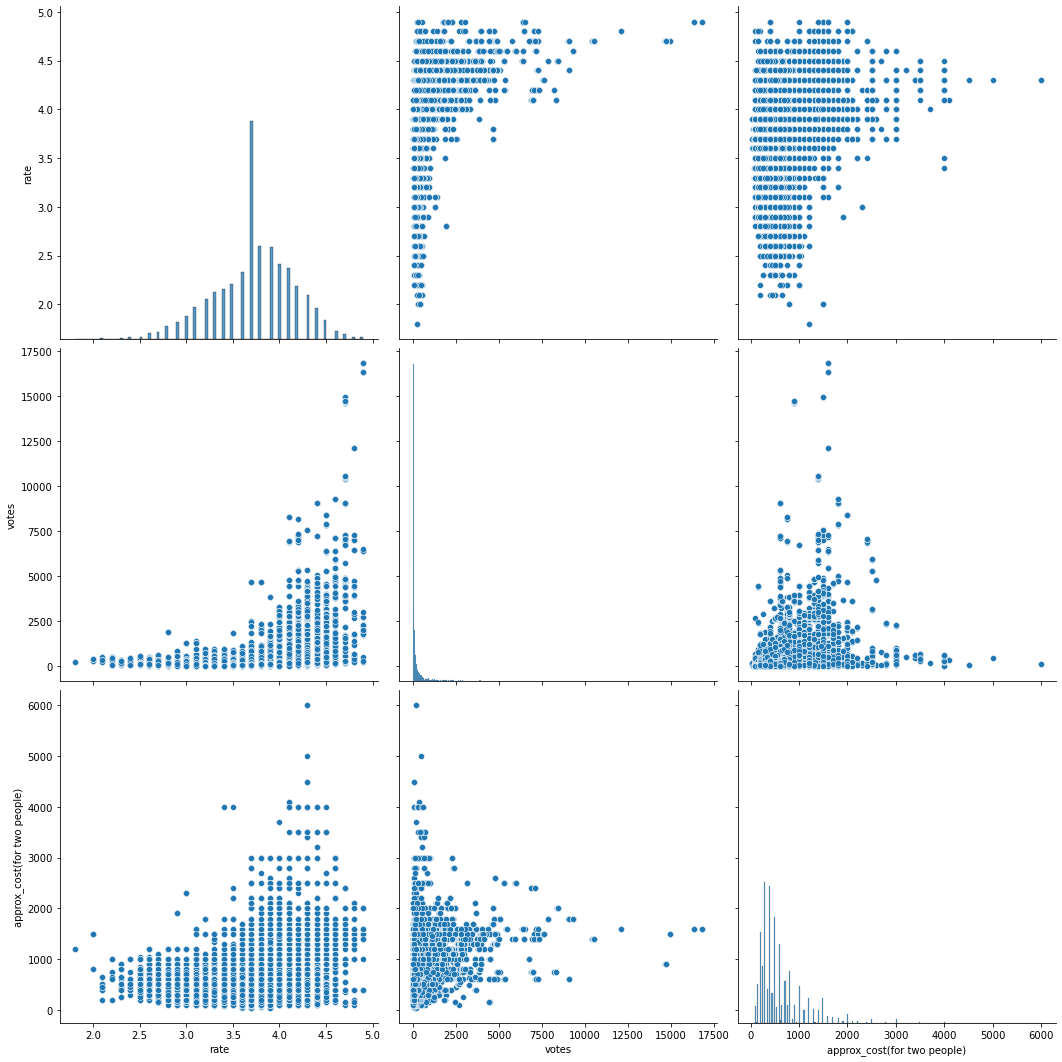

In [131]:
#1 pairplot
sns.pairplot(data2, height=5)

**Observations**
<ol>
    <li> A lot of outliers present in the data for all three numeric columns
    <li> It is difficult to make any conclusion on the data based on the graph shown above.

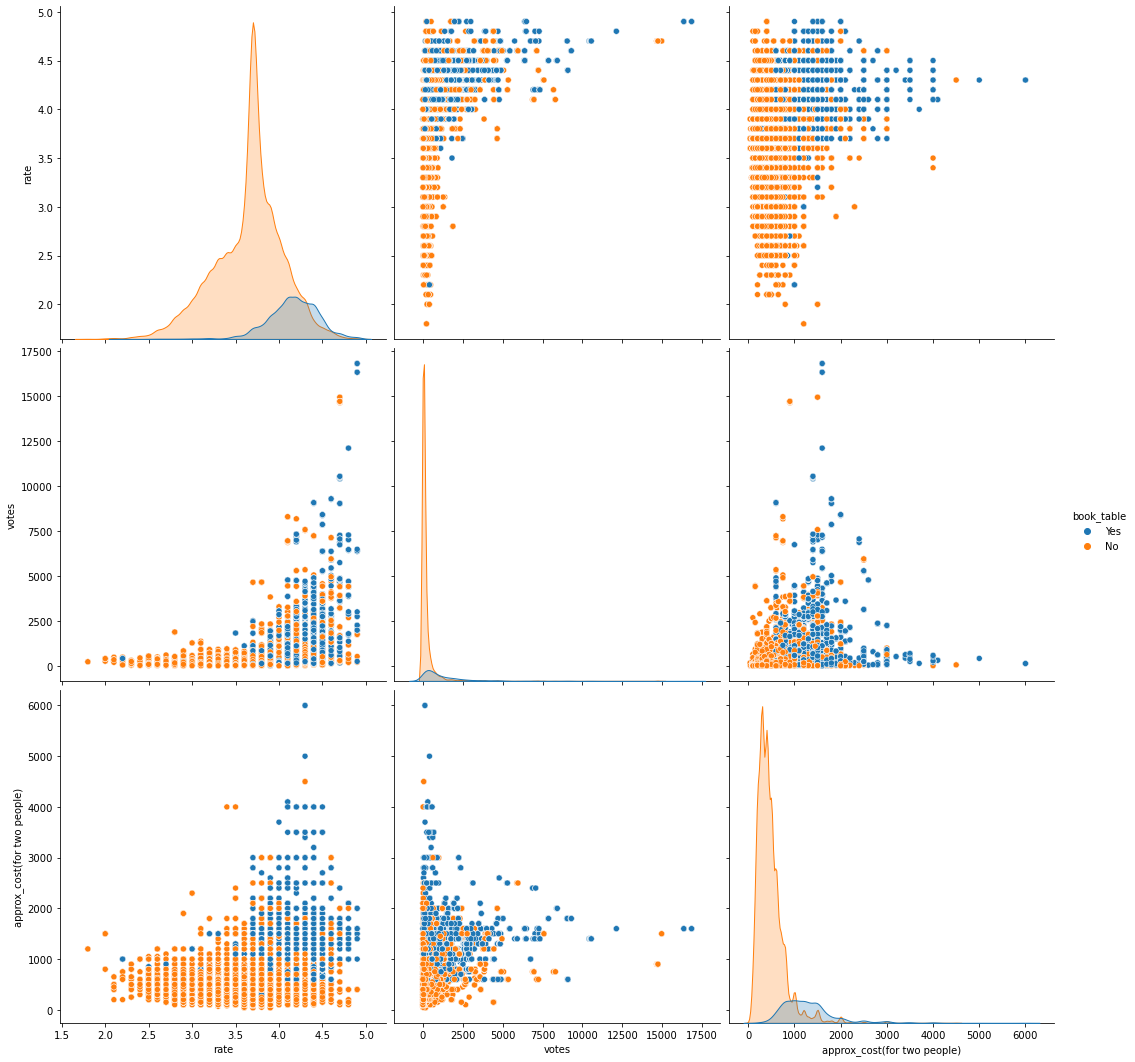

In [110]:
#1 pairplot
sns.pairplot(data2, height=5, hue='book_table')

**Observations**
<ol>
    <li> There is much more data where book table = yes
    <li> On average, the approx cost for book table yes option is more than that for the no option
    <li> Book table yes option has higher ratings than that for the no option
    <li> No. of votes seem to be similar for either option

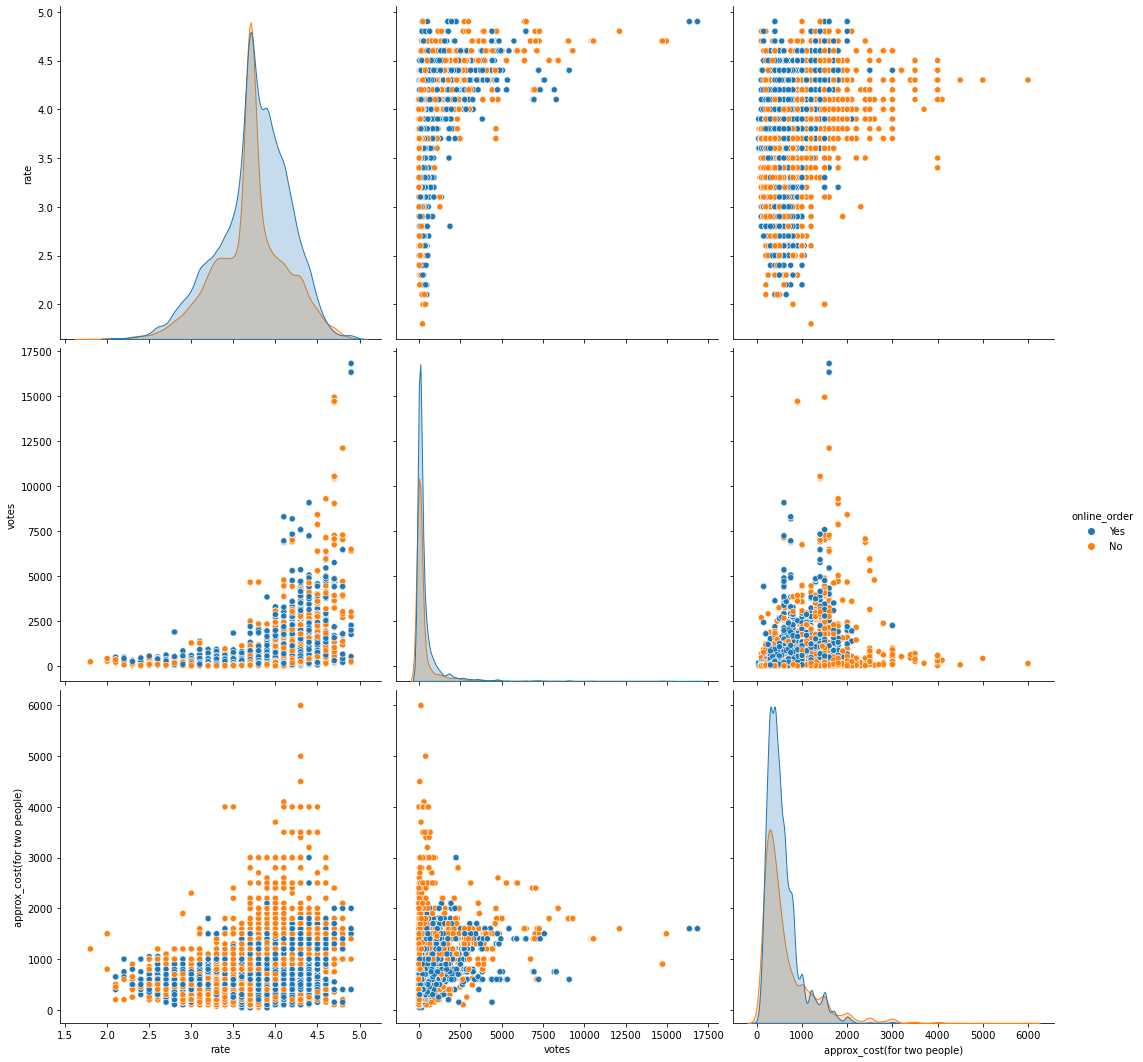

In [111]:
#2 pairplot
sns.pairplot(data2, height=5, hue='online_order')

**Observations**
<ol>
    <li> Online order no option seems to be more expensive
    <li> Ratings and no. of votes seem to be fairly balanced for both the groups

**Boxplots**

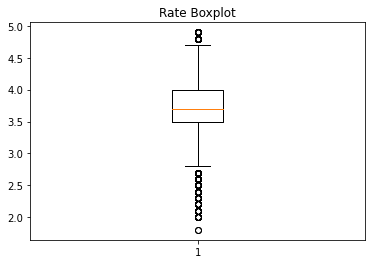

In [114]:
#1 Rate
plt.figure()
plt.boxplot(data = data2, x='rate')
plt.title('Rate Boxplot')
plt.show()

<AxesSubplot:>

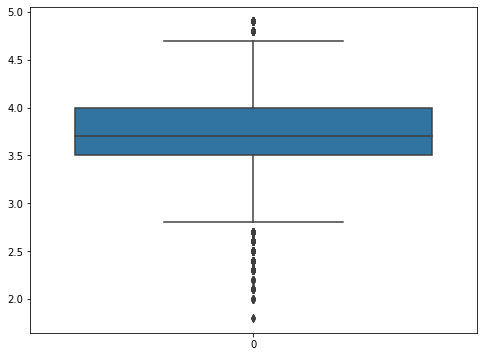

In [127]:
#1 Rate
plt.figure(figsize=(8,6))
sns.boxplot(data = data2['rate'])

**Observations**
<li> The median rate for all the restaurants comes to around 3.65
<li> Ratings somewhere above 4.6 and ratings lower tha 2.8 are seen as outliers

<AxesSubplot:>

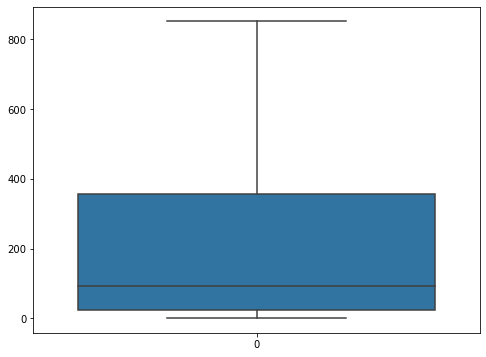

In [129]:
#2 Votes
plt.figure(figsize=(8,6))
sns.boxplot(data = data2['votes'][data2['votes']!=0],showfliers=False) # remove outliers

**From the boxplot, I can see that a good amount of number of votes are seen as outliers**
I have updated the graph and removed outliers.

**Observations**
<li> The median number of votes are around 100
<li> The Number of votes somewhere above 800 are seen as outliers

<AxesSubplot:>

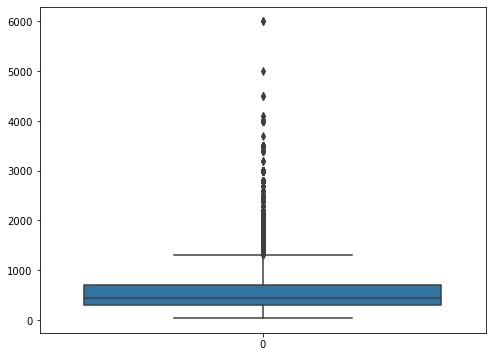

In [130]:
#3 Approx cost
plt.figure(figsize=(8,6))
sns.boxplot(data = data2['approx_cost(for two people)'])

**Observations**
<li> The median cost for all the restaurants comes to around 400
<li> Approx. Costings somewhere above 1200 are seen as outliers